In [1]:
# Global Solutions

# Integrantes:

# Fabio Lanfranchi
# Genival Jr
# Lucas Alves

In [2]:
# Criei um notebook e realize a simulação de uma SNN, com uma população de 5 neurônios, utilizando o modelo IF_curr_exp()
# e uma projeção do tipo OneToOneConnector. Considere o valor target da membrana potencial de 5 nA e um tempo de
# simulação de 10 ms. Realize a simulação e criei uma visualização dos spikes e voltagens gerados.

import pyNN.spiNNaker as sim
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt

In [3]:
# Setup the Simulator: estamos alocando max 100 neuronios por cada core do processador, o tempo entre spikes = 1.0ms
sim.setup(timestep=1.0)
sim.set_number_of_neurons_per_core(sim.IF_curr_exp, 100)

2022-06-10 21:13:43 INFO: Read cfg files: /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/bbpnrsoa/.spynnaker.cfg
2022-06-10 21:13:43 INFO: Will search these locations for binaries: /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/common_model_binaries : /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/model_binaries
2022-06-10 21:13:43 WARNING: /home/bbpnrsoa/reports has 15 old reports that have not been closed
2022-06-10 21:13:43 INFO: Setting time scale factor to 1.
2022-06-10 21:13:43 INFO: Setting machine time step to 1000 micro-seconds.


['/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/bbpnrsoa/.spynnaker.cfg']


In [4]:
# Create the neural populations neur = 5
pop_1 = sim.Population(5, sim.IF_curr_exp(), label="pop_1")
input = sim.Population(5, sim.SpikeSourceArray(spike_times=[0]), label="input")

In [5]:
input_proj = sim.Projection(input, pop_1, sim.OneToOneConnector(),
synapse_type=sim.StaticSynapse(weight=5, delay=1))


In [6]:
# Setup data recording: vamos a grabar os spikes na menbrana
pop_1.record(["spikes", "v"])


In [7]:
# Run the simulation
simtime = 10 #spikes na menbrana potencial
sim.run(simtime)

2022-06-10 21:13:43 INFO: Starting execution process
2022-06-10 21:13:43 INFO: Simulating for 10 1.0ms timesteps using a hardware timestep of 1000us
Adding Splitter selectors where appropriate
|0%                          50%                         100%|
2022-06-10 21:13:43 INFO: Time 0:00:00.008505 taken by SpynnakerSplitterSelector
Adding delay extensions as required
|0%                          50%                         100%|
2022-06-10 21:13:43 INFO: Time 0:00:00.008017 taken by DelaySupportAdder
2022-06-10 21:13:46 INFO: Time 0:00:03.005296 taken by SpallocMaxMachineGenerator
Preallocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2022-06-10 21:13:55 INFO: Time 0:00:08.968073 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2022-06-10

10.0

In [8]:
# Retrieve and process the recorded data
neo = pop_1.get_data(variables=["spikes", "v"])#obtenemos os dados dos spikes trains
spikes = neo.segments[0].spiketrains
print(spikes)
v = neo.segments[0].filter(name='v')[0]
print(v)
sim.end()

Getting spikes for pop_1
|0%                          50%                         100%|
Getting v for pop_1
|0%                          50%                         100%|

[<SpikeTrain(array([7.]) * ms, [0.0 ms, 10.0 ms])>, <SpikeTrain(array([7.]) * ms, [0.0 ms, 10.0 ms])>, <SpikeTrain(array([7.]) * ms, [0.0 ms, 10.0 ms])>, <SpikeTrain(array([7.]) * ms, [0.0 ms, 10.0 ms])>, <SpikeTrain(array([7.]) * ms, [0.0 ms, 10.0 ms])>]
[[-65.         -65.         -65.         -65.         -65.        ]
 [-65.         -65.         -65.         -65.         -65.        ]
 [-60.58001709 -60.58001709 -60.58001709 -60.58001709 -60.58001709]
 [-57.17681885 -57.17681885 -57.17681885 -57.17681885 -57.17681885]
 [-54.59555054 -54.59555054 -54.59555054 -54.59555054 -54.59555054]
 [-52.67724609 -52.67724609 -52.67724609 -52.67724609 -52.67724609]
 [-51.29220581 -51.29220581 -51.29220581 -51.29220581 -51.29220581]
 [-50.33474731 -50.33474731 -50.33474731 -50.33474731 -50.33474731]
 [-65.         -65.         -65.         -65.         -65.        ]
 [-65.         -65.         -65.         -65.         -65.        ]] mV


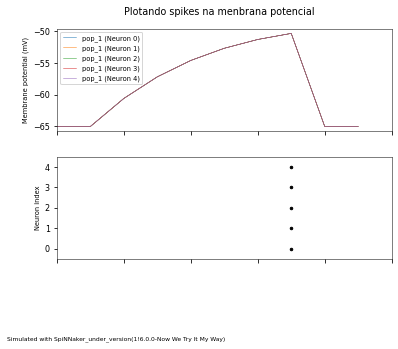

In [9]:
%matplotlib inline
plot.Figure(
    # plot voltage for first ([0]) neuron
    plot.Panel(v, ylabel="Membrane potential (mV)",
               data_labels=[pop_1.label], yticks=True, xlim=(0, simtime)),
    # plot spikes (or in this case spike)
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Plotando spikes na menbrana potencial",
    annotations="Simulated with {}".format(sim.name())
)

In [10]:
# Desenvolva um notebook utilizando source spikes do tipo external_devices inputs para a simulação de uma SNN com uma
# população de 5 neurônios. Considere uma população receptora do tipo IF_curr_exp() e uma projeção OneToOneConnector.
# A membrana potencial deverá ter um valor target de 5nA. Execute a simulação por 1000 segundos e criei uma visualização
# dos spikes e voltagens gerados.


from time import sleep

def send_spikes(label, connection):
    # delay para aguardar respostas
    sleep(0.01)
    
    # envio do spike no primeiro neuronio
    connection.send_spike(label, 0)
    
    # delay aguardar resposta, envio despikes aos neuronios restantes
    sleep(0.1)
    connection.send_spikes(label, range(1, 5))

In [11]:
#Criação do rotulo do injector, dever coincidir em múltiplos lugares
injector_label = "injector"

In [12]:
#Criação da conexão
#Definindo port = None, permite alocar automaticamente uma porta
connection = sim.external_devices.SpynnakerLiveSpikesConnection(
    local_port=None, send_labels=[injector_label])

2022-06-10 21:14:40 INFO: 0.0.0.0:39318 Waiting for message to indicate that the database is ready


In [13]:
#Antes de iniciar a simulação realizamos um callback da conexão
connection.add_start_resume_callback(injector_label, send_spikes)

In [14]:
#tempo de simulação
sim.setup(1.0)

2022-06-10 21:14:40 INFO: Read cfg files: /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/bbpnrsoa/.spynnaker.cfg
2022-06-10 21:14:40 INFO: Will search these locations for binaries: /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/common_model_binaries : /home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/model_binaries
2022-06-10 21:14:40 WARNING: /home/bbpnrsoa/reports has 15 old reports that have not been closed
2022-06-10 21:14:40 INFO: Setting time scale factor to 1.
2022-06-10 21:14:40 INFO: Setting machine time step to 1000 micro-seconds.


['/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/bbpnrsoa/sPyNNaker/lib/python3.8/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/bbpnrsoa/.spynnaker.cfg']


0

In [15]:
#configurando um injector population com 5 neuronios

injector = sim.Population(
    5, sim.external_devices.SpikeInjector(
        database_notify_port_num=connection.local_port),#registrando a conexão como listener
    # Critical: Make sure the label is used!
    label=injector_label)

In [16]:
#configurando uma população para receber spikes
pop = sim.Population(5, sim.IF_curr_exp(), label="pop")

In [17]:
#vamos a graba spikes
pop.record(["spikes", "v"])

In [18]:
#conectando as source spikes com os neuonios
sim.Projection(injector, pop, sim.OneToOneConnector(), sim.StaticSynapse(weight=5))

projection from pre injector to post pop with connector OneToOneConnector()

In [19]:
#executando a simulação 1000 segundos
sim.run(1000)

2022-06-10 21:14:40 INFO: Starting execution process
2022-06-10 21:14:40 INFO: Simulating for 1000 1.0ms timesteps using a hardware timestep of 1000us
Adding Splitter selectors where appropriate
|0%                          50%                         100%|
2022-06-10 21:14:40 INFO: Time 0:00:00.008696 taken by SpynnakerSplitterSelector
Adding delay extensions as required
|0%                          50%                         100%|
2022-06-10 21:14:40 INFO: Time 0:00:00.007777 taken by DelaySupportAdder
2022-06-10 21:14:43 INFO: Time 0:00:03.061874 taken by SpallocMaxMachineGenerator
Preallocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2022-06-10 21:14:52 INFO: Time 0:00:09.046100 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2022-06-

1000.0

In [20]:
#obtendo os spikes da simulação
data_sim = pop.get_data(["spikes", "v"])
spikes = data_sim.segments[0].spiketrains
print(spikes)
v = data_sim.segments[0].filter(name='v')[0]
print(v)

Getting spikes for pop
|0%                          50%                         100%|
Getting v for pop
|0%                          50%                         100%|

[<SpikeTrain(array([19.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([119.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([119.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([119.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([119.]) * ms, [0.0 ms, 1000.0 ms])>]
[[-65.         -65.         -65.         -65.         -65.        ]
 [-65.         -65.         -65.         -65.         -65.        ]
 [-65.         -65.         -65.         -65.         -65.        ]
 ...
 [-64.99938965 -64.99938965 -64.99938965 -64.99938965 -64.99938965]
 [-64.99938965 -64.99938965 -64.99938965 -64.99938965 -64.99938965]
 [-64.99938965 -64.99938965 -64.99938965 -64.99938965 -64.99938965]] mV


In [21]:
sim.end() #finalizando simulação

In [22]:
print(spikes)

[<SpikeTrain(array([19.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([119.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([119.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([119.]) * ms, [0.0 ms, 1000.0 ms])>, <SpikeTrain(array([119.]) * ms, [0.0 ms, 1000.0 ms])>]


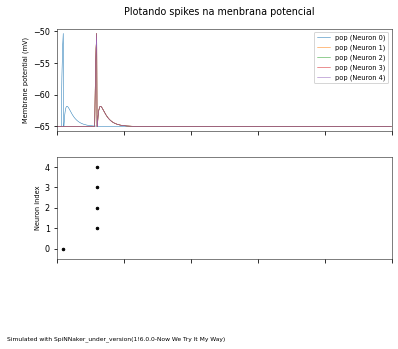

In [23]:
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline


%matplotlib inline
plot.Figure(
    # plot voltage for first ([0]) neuron
    plot.Panel(v, ylabel="Membrane potential (mV)",
               data_labels=[pop.label], yticks=True, xlim=(0, 1000)),
    # plot spikes (or in this case spike)
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, 1000)),
    title="Plotando spikes na menbrana potencial",
    annotations="Simulated with {}".format(sim.name())
)